<a href="https://colab.research.google.com/github/JAVerduzco/Renewable_Energy_Analysis/blob/main/World_Renewable_Energy_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Renewable Energy Data Analysis
MSc. Alejandro Verduzco

https://www.linkedin.com/in/alejandroverduzco/

alejvcm@gmail.com

Data taken from: https://github.com/owid/energy-data

" Our complete Energy dataset is a collection of key metrics maintained by *Our World in Data*. It is updated regularly and includes data on energy consumption (primary energy, per capita, and growth rates), energy mix, electricity mix and other relevant metrics."

## Objective
* Find out which countries produce more renewable energy
* Find out which countries have the fastest growth in renewable energy production
* Forecast renewable energy growth
* Does GDP influence in the adoption of renewable energy?
* Top countries per energy type
* Top generators per capita

## Importing and reading data

In [ ]:
!pip install bar_chart_race

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import bar_chart_race as bcr

plt.style.use('seaborn')

<ipython-input-4-b8b430301d2e>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
data_url = 'https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv'
columns_info_url = 'https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-codebook.csv'

In [ ]:
#load data in dataframes
energy_df_0 = pd.read_csv(data_url)
columns_description = pd.read_csv(columns_info_url)

In [ ]:
columns_description.column

0                     country
1                        year
2                    iso_code
3                  population
4                         gdp
                ...          
124      wind_elec_per_capita
125          wind_electricity
126    wind_energy_per_capita
127           wind_share_elec
128         wind_share_energy
Name: column, Length: 129, dtype: object

In [ ]:
columns_description[columns_description['column']=='wind_elec_per_capita']

,column,description,source
124,wind_elec_per_capita,"Per capita electricity generation from wind, m...",Calculated by Our World in Data based on the E...


In [ ]:
def get_column_info(column):
    return columns_description[columns_description['column']==column]


In [ ]:
energy_df_0.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [ ]:
energy_df_0.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

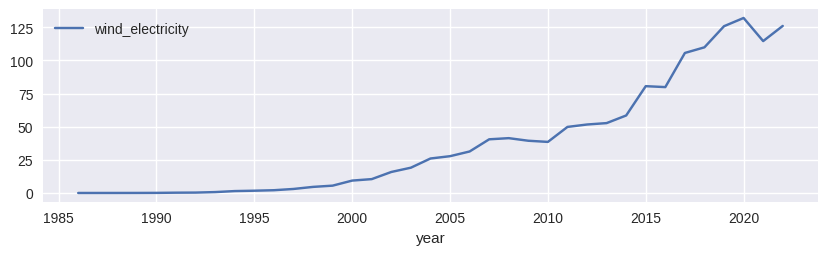

In [ ]:
germany = energy_df_0[energy_df_0['country']=='Germany']
germany.plot(x='year',y='wind_electricity',figsize=(10,2.5));

In [ ]:
energy_df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB


The original dataset has 129 columns, it is necessary to discard columns we won't use.

In [ ]:
energy_df_0.describe()

,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,22012.000000,1.812300e+04,1.111300e+04,1747.000000,2687.000000,2302.000000,2767.000000,5275.000000,5527.000000,5492.000000,...,6849.000000,4035.000000,2413.000000,4639.000000,4744.000000,7065.000000,7996.000000,4065.000000,6886.000000,4101.000000
mean,1974.213247,1.053096e+08,3.585114e+11,46.091694,2.719074,133.558459,38.068209,64.716800,10.966685,1.954035,...,0.622750,0.210395,267.541206,7.314174,53.422938,62.811828,17.561153,232.108949,1.404910,0.651413
std,35.058653,4.640460e+08,2.411179e+12,274.616745,10.057018,264.707851,111.623148,201.043915,47.953561,5.274155,...,2.066186,0.643304,5940.944120,37.327922,273.255306,252.734217,101.693172,733.841324,4.489043,1.893820
min,1900.000000,1.833000e+03,1.642060e+08,-100.000000,-50.843000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-51.208000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1946.000000,1.712404e+06,1.365898e+10,-0.616500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1984.000000,6.991543e+06,4.167411e+10,8.179000,0.000000,15.482000,0.673000,0.146000,0.010000,0.062000,...,0.000000,0.000000,20.000000,0.000000,0.005000,0.000000,0.000000,0.051000,0.000000,0.003000
75%,2003.000000,2.557688e+07,1.744295e+11,26.508500,0.861500,165.266750,13.629500,34.289000,0.690000,1.577500,...,0.095000,0.018500,47.971000,0.315000,2.357750,2.101000,0.140000,45.523000,0.372000,0.268000
max,2022.000000,7.975105e+09,1.136302e+14,5659.328000,141.131000,2588.512000,1199.207000,2514.102000,677.570000,71.429000,...,40.000000,7.586000,242384.844000,665.413000,5487.600000,3219.852000,2139.230000,8422.012000,56.840000,26.157000


In [ ]:
# Looking for null values
energy_df_0.isna().sum()

country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64

In [ ]:
energy_df_0.isnull().sum().sum()

1942324

There is a lot of null values.

## Data Cleaning

In [ ]:
# Creating list of columns of interest
cols_selected=['iso_code',
           'country',
           'year',
           'population',
           'gdp',
           'biofuel_electricity',
           'hydro_electricity',
           'nuclear_electricity',
           'solar_electricity',
           'wind_electricity',
           'coal_electricity',
           'gas_electricity',
           'oil_electricity',
           'other_renewable_exc_biofuel_electricity',
           'biofuel_elec_per_capita',
           'hydro_elec_per_capita',
           'nuclear_elec_per_capita',
           'solar_elec_per_capita',
           'wind_elec_per_capita',
           'coal_elec_per_capita',
           'gas_elec_per_capita',
           'oil_elec_per_capita',
            'renewables_electricity',
            'renewables_elec_per_capita',
            'fossil_electricity'
            ]

In [ ]:
energy_df_1=energy_df_0[cols_selected]
energy_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   iso_code                                 16512 non-null  object 
 1   country                                  22012 non-null  object 
 2   year                                     22012 non-null  int64  
 3   population                               18123 non-null  float64
 4   gdp                                      11113 non-null  float64
 5   biofuel_electricity                      5527 non-null   float64
 6   hydro_electricity                        8884 non-null   float64
 7   nuclear_electricity                      8516 non-null   float64
 8   solar_electricity                        7956 non-null   float64
 9   wind_electricity                         7996 non-null   float64
 10  coal_electricity                         6444 

In [ ]:
energy_df_1.head()

,iso_code,country,year,population,gdp,biofuel_electricity,hydro_electricity,nuclear_electricity,solar_electricity,wind_electricity,...,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,oil_elec_per_capita,renewables_electricity,renewables_elec_per_capita,fossil_electricity
0,NaN,ASEAN (Ember),2000,NaN,NaN,5.60,50.37,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.90,NaN,295.75
1,NaN,ASEAN (Ember),2001,NaN,NaN,6.02,54.26,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.68,NaN,320.51
2,NaN,ASEAN (Ember),2002,NaN,NaN,6.06,53.32,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.99,NaN,346.83
3,NaN,ASEAN (Ember),2003,NaN,NaN,6.69,53.28,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.71,NaN,371.44
4,NaN,ASEAN (Ember),2004,NaN,NaN,7.57,52.88,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.02,NaN,407.92


In [ ]:
energy_df_1= energy_df_1[energy_df_1['year']>=2000]

In [ ]:
energy_df_1.isna().sum().sum()

35103

Most of the null values are in the first years of the dataset, removing years from 1900 to 1989 reduced null values.

In [ ]:
# Iso_code column wont be necessary
energy_df_1.drop('iso_code', axis=1,inplace=True)


In [ ]:
energy_df_1.isna().sum()

country                                       0
year                                          0
population                                 1481
gdp                                        3505
biofuel_electricity                        1482
hydro_electricity                          1093
nuclear_electricity                        1253
solar_electricity                          1059
wind_electricity                           1068
coal_electricity                           1240
gas_electricity                            1240
oil_electricity                            1240
other_renewable_exc_biofuel_electricity    1516
biofuel_elec_per_capita                    1734
hydro_elec_per_capita                      1644
nuclear_elec_per_capita                    1728
solar_elec_per_capita                      1610
wind_elec_per_capita                       1619
coal_elec_per_capita                       1699
gas_elec_per_capita                        1699
oil_elec_per_capita                     

We still have a lot of null values, so we're going to fill them with forward and then backwards fill.

In [ ]:
energy_df_1.ffill(inplace=True)
energy_df_1.bfill(inplace=True)

In [ ]:
energy_df_1.isna().sum()

country                                    0
year                                       0
population                                 0
gdp                                        0
biofuel_electricity                        0
hydro_electricity                          0
nuclear_electricity                        0
solar_electricity                          0
wind_electricity                           0
coal_electricity                           0
gas_electricity                            0
oil_electricity                            0
other_renewable_exc_biofuel_electricity    0
biofuel_elec_per_capita                    0
hydro_elec_per_capita                      0
nuclear_elec_per_capita                    0
solar_elec_per_capita                      0
wind_elec_per_capita                       0
coal_elec_per_capita                       0
gas_elec_per_capita                        0
oil_elec_per_capita                        0
renewables_electricity                     0
renewables

## Exploratory Data Aanalysis

Before doing EDA, im going to separate in a different dataframe the information that has "World" in country columns.

In [ ]:
world_df = energy_df_1[energy_df_1['country']=='World']
world_df.head()

,country,year,population,gdp,biofuel_electricity,hydro_electricity,nuclear_electricity,solar_electricity,wind_electricity,coal_electricity,...,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,oil_elec_per_capita,renewables_electricity,renewables_elec_per_capita,fossil_electricity
21609,World,2000,6.148899e+09,5.986666e+13,148.65,2621.36,2507.43,1.08,31.16,5719.12,...,426.314,407.785,0.176,5.068,930.105,436.031,196.704,2854.62,464.249,9609.74
21610,World,2001,6.230747e+09,5.986666e+13,143.10,2561.04,2573.71,1.35,38.16,5801.14,...,411.033,413.066,0.217,6.124,931.051,453.822,192.208,2796.25,448.782,9826.39
21611,World,2002,6.312408e+09,5.986666e+13,156.61,2601.39,2601.89,1.69,52.04,6056.12,...,412.107,412.187,0.268,8.244,959.399,480.606,186.233,2865.81,453.996,10265.48
21612,World,2003,6.393898e+09,5.986666e+13,167.91,2602.33,2577.71,2.07,63.43,6458.61,...,407.002,403.152,0.324,9.920,1010.121,495.125,187.397,2891.81,452.277,10822.59
21613,World,2004,6.475751e+09,5.986666e+13,184.54,2796.69,2682.73,2.71,85.26,6697.61,...,431.871,414.273,0.418,13.166,1034.260,526.300,181.828,3127.14,482.900,11283.27


In [ ]:
energy_df_1=energy_df_1[energy_df_1['country']!='World']

In [ ]:
energy_df_1.tail()

,country,year,population,gdp,biofuel_electricity,hydro_electricity,nuclear_electricity,solar_electricity,wind_electricity,coal_electricity,...,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,oil_elec_per_capita,renewables_electricity,renewables_elec_per_capita,fossil_electricity
22007,Zimbabwe,2018,15052191.0,2.271535e+10,0.39,5.05,0.0,0.02,0.0,3.69,...,335.499,0.0,1.329,0.0,245.147,0.0,2.657,5.46,362.738,3.73
22008,Zimbabwe,2019,15354606.0,2.271535e+10,0.38,4.17,0.0,0.03,0.0,3.62,...,271.580,0.0,1.954,0.0,235.760,0.0,2.605,4.58,298.282,3.66
22009,Zimbabwe,2020,15669663.0,2.271535e+10,0.35,3.81,0.0,0.03,0.0,3.36,...,243.145,0.0,1.915,0.0,214.427,0.0,2.553,4.19,267.396,3.40
22010,Zimbabwe,2021,15993525.0,2.271535e+10,0.38,4.00,0.0,0.04,0.0,3.57,...,250.101,0.0,2.501,0.0,223.215,0.0,2.501,4.42,276.362,3.61
22011,Zimbabwe,2022,16320539.0,2.271535e+10,0.38,4.00,0.0,0.04,0.0,3.57,...,250.101,0.0,2.501,0.0,223.215,0.0,2.501,4.42,276.362,3.61


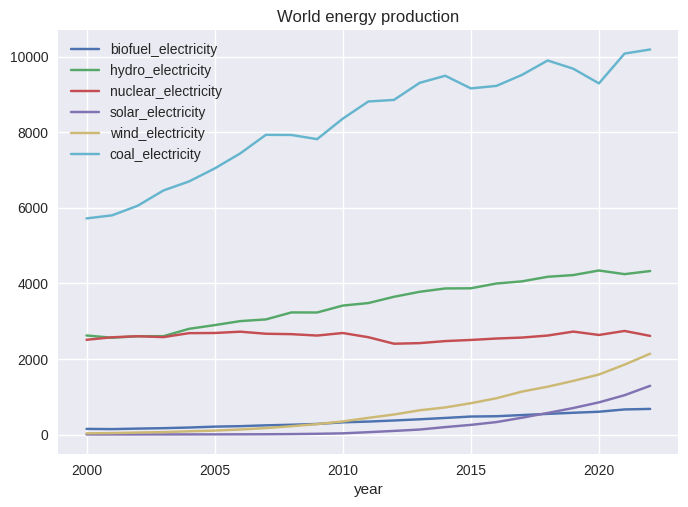

In [ ]:
world_df.plot(x='year',y=['biofuel_electricity','hydro_electricity', 'nuclear_electricity', 'solar_electricity', 'wind_electricity', 'coal_electricity'])
plt.title('World energy production');

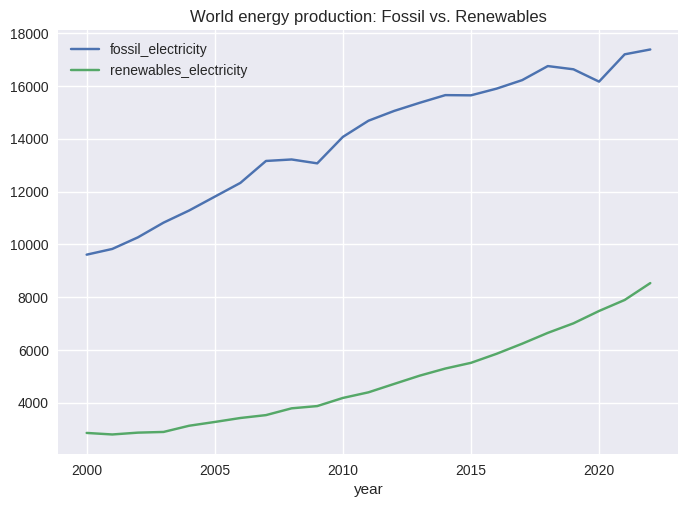

In [ ]:
world_df.plot(x='year',y=['fossil_electricity','renewables_electricity'])
plt.title('World energy production: Fossil vs. Renewables');

In [ ]:
energy_df_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 22011
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  6636 non-null   object 
 1   year                                     6636 non-null   int64  
 2   population                               6636 non-null   float64
 3   gdp                                      6636 non-null   float64
 4   biofuel_electricity                      6636 non-null   float64
 5   hydro_electricity                        6636 non-null   float64
 6   nuclear_electricity                      6636 non-null   float64
 7   solar_electricity                        6636 non-null   float64
 8   wind_electricity                         6636 non-null   float64
 9   coal_electricity                         6636 non-null   float64
 10  gas_electricity                          6636 n

In [ ]:
energy_df_1.describe()

,year,population,gdp,biofuel_electricity,hydro_electricity,nuclear_electricity,solar_electricity,wind_electricity,coal_electricity,gas_electricity,...,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,oil_elec_per_capita,renewables_electricity,renewables_elec_per_capita,fossil_electricity
count,6636.000000,6.636000e+03,6.636000e+03,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000
mean,2010.669530,1.680449e+08,7.720069e+11,23.511768,184.478721,159.482358,42.492986,75.735853,433.737531,306.732769,...,1740.029626,300.595139,59.865945,222.648471,558.933465,933.011868,769.088916,336.036981,2134.632403,785.699857
std,6.467777,6.542838e+08,2.394778e+12,74.812113,503.014233,446.864006,148.385986,245.268152,1398.471138,803.077220,...,5423.429120,895.868921,155.646184,623.471505,1140.430666,2298.731827,1773.701352,950.690096,6207.796931,2176.337249
min,2000.000000,1.833000e+03,3.128536e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1.042664e+06,3.122540e+10,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.161500,0.100000,17.744500,0.360000
50%,2011.000000,6.703802e+06,1.652551e+11,0.030000,2.440000,0.000000,0.010000,0.000000,0.000000,2.010000,...,120.410500,0.000000,0.000000,0.000000,0.000000,64.796000,115.877000,4.295000,251.161000,7.385000
75%,2016.000000,3.195321e+07,4.534184e+11,2.132500,32.187500,10.970000,0.540000,2.105000,32.280000,57.297500,...,756.659000,0.000000,31.283000,72.143000,478.154500,945.391250,409.791250,48.034000,1236.728250,149.110000
max,2022.000000,4.721383e+09,1.815162e+13,633.770000,3361.370000,2579.650000,1171.280000,2051.530000,9482.470000,4459.830000,...,40897.941000,8605.923000,1279.347000,3219.852000,8789.417000,21704.871000,11547.416000,7223.910000,56030.785000,14381.540000


In [ ]:
energy_df_1.country.unique()

array(['ASEAN (Ember)', 'Afghanistan', 'Africa', 'Africa (EI)',
       'Africa (Ember)', 'Africa (Shift)', 'Albania', 'Algeria',
       'American Samoa', 'Angola', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia & Oceania (EIA)',
       'Asia (Ember)', 'Asia Pacific (EI)', 'Asia and Oceania (Shift)',
       'Australia', 'Australia and New Zealand (EIA)', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (EI)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central & South America (EIA)',
       'Central African Republic', 'Central America (EI)',
       'Central and South America (Shift)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Isla

In [ ]:
# Removing EIA and other redundant data
energy_df_1=energy_df_1[energy_df_1['country'].str.contains('(EIA)')==False ]
energy_df_1=energy_df_1[energy_df_1['country'].str.contains('(BP)')==False ]
energy_df_1=energy_df_1[energy_df_1['country'].str.contains('(Ember)')==False ]
energy_df_1=energy_df_1[energy_df_1['country'].str.contains('(Shift)')==False ]
energy_df_1=energy_df_1[energy_df_1['country'].str.contains('(EI)')==False ]
energy_df_1.country.unique()

<ipython-input-34-61affdb9f0bd>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  energy_df_1=energy_df_1[energy_df_1['country'].str.contains('(EIA)')==False ]
<ipython-input-34-61affdb9f0bd>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  energy_df_1=energy_df_1[energy_df_1['country'].str.contains('(BP)')==False ]
<ipython-input-34-61affdb9f0bd>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  energy_df_1=energy_df_1[energy_df_1['country'].str.contains('(Ember)')==False ]
<ipython-input-34-61affdb9f0bd>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  energy_df_1=energy_df_1[energy_df_1['country'].str.contains('(Shift)')==False ]
<ipyt

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe', 'Europ

In [ ]:
## Remove some categories that are not countries

cats_to_remove = ['Upper-middle-income countries',
'European Union (27)',
'High-income countries',
'Low-income countries',
'Lower-middle-income countries']

energy_df_1 = energy_df_1[~energy_df_1['country'].isin(cats_to_remove)]

In [ ]:
# move continents to a different df
continents = ['Europe','Asia','Oceania','Africa','Antarctica','North America','South America']
continents_df = energy_df_1[energy_df_1['country'].isin(continents)]
continents_df

,country,year,population,gdp,biofuel_electricity,hydro_electricity,nuclear_electricity,solar_electricity,wind_electricity,coal_electricity,...,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,oil_elec_per_capita,renewables_electricity,renewables_elec_per_capita,fossil_electricity
245,Africa,2000,818952374.0,6.759497e+10,2.20,74.520,13.010,0.000,0.230,194.630,...,90.994,15.886,0.000,0.281,237.657,109.542,55.950,77.380,94.487,330.160
246,Africa,2001,839464127.0,6.759497e+10,2.17,81.220,10.720,0.000,0.460,199.220,...,96.752,12.770,0.000,0.548,237.318,114.811,55.524,84.330,100.457,342.210
247,Africa,2002,860611762.0,6.759497e+10,2.20,83.410,11.990,0.020,0.430,205.160,...,96.919,13.932,0.023,0.500,238.389,130.558,53.892,86.450,100.452,363.900
248,Africa,2003,882349569.0,6.759497e+10,1.98,81.680,12.660,0.020,0.610,219.970,...,92.571,14.348,0.023,0.691,249.300,135.037,54.797,85.080,96.424,387.470
249,Africa,2004,904781595.0,6.759497e+10,2.19,86.540,14.280,0.020,0.780,229.760,...,95.647,15.783,0.022,0.862,253.940,148.655,51.029,90.560,100.090,410.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18052,South America,2018,424740741.0,6.732722e+11,58.79,681.020,21.300,10.380,60.050,58.800,...,1603.378,50.148,24.438,141.380,138.437,498.610,127.725,810.450,1908.105,324.830
18053,South America,2019,428318218.0,6.732722e+11,58.33,665.790,23.130,15.350,71.920,59.300,...,1554.428,54.002,35.838,167.913,138.448,511.466,103.825,811.590,1894.830,322.840
18054,South America,2020,431530105.0,6.732722e+11,63.04,661.370,23.270,21.450,78.880,55.190,...,1532.616,53.924,49.707,182.791,127.894,482.585,110.097,824.990,1911.779,310.950
18055,South America,2021,434254167.0,6.732722e+11,64.34,625.540,24.870,31.880,98.670,61.310,...,1440.493,57.271,73.413,227.217,141.185,589.977,146.136,820.760,1890.045,380.970


In [ ]:
energy_df_1 = energy_df_1[~energy_df_1['country'].isin(continents)]
energy_df_1.country.unique()


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland Islands', 'Faroe Islands',
       'Fij

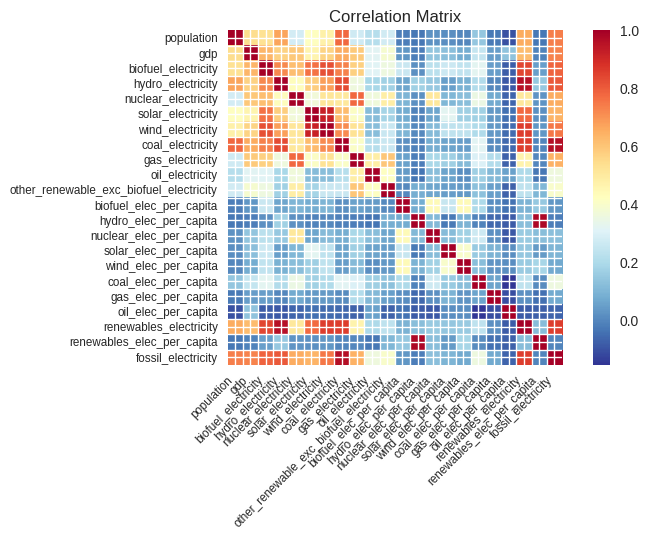

In [ ]:
import statsmodels.api as sm
corr = energy_df_1.set_index(['year','country']).corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()


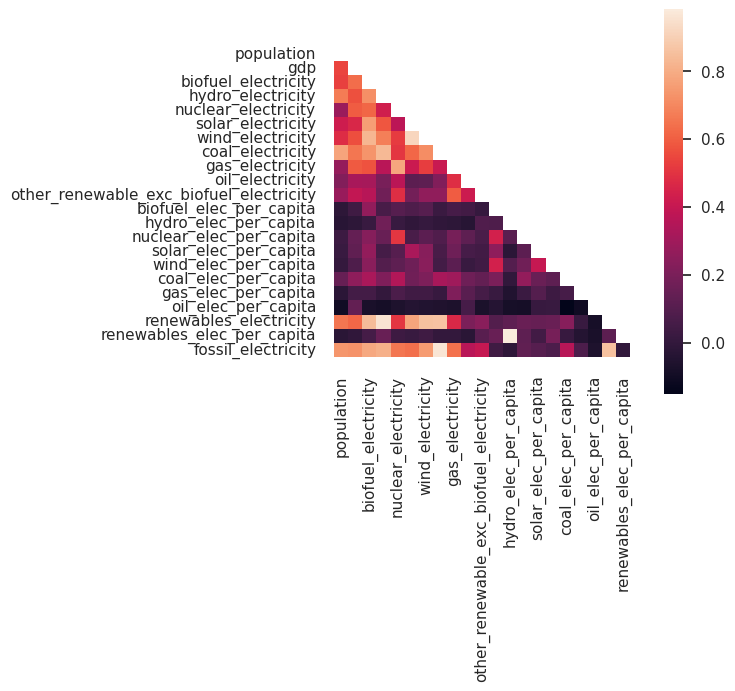

In [ ]:
sns.set_theme(style="white")
corr = energy_df_1.set_index(['year','country']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True);

## Data analysis and Visualization

In [ ]:
# Find out which countries produce more renewable energy
# Find out which countries have the fastest growth in renewable energy production
# Forecast renewable energy growth
# Does GDP influence in the adoption of renewable energy?
# Top 5 per energy

### 1. Which countries produce more renewable energy?


In [ ]:
year_filtered = energy_df_1[energy_df_1['year']==2015]
year_filtered.head()

,country,year,population,gdp,biofuel_electricity,hydro_electricity,nuclear_electricity,solar_electricity,wind_electricity,coal_electricity,...,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,oil_elec_per_capita,renewables_electricity,renewables_elec_per_capita,fossil_electricity
138,Afghanistan,2015,33753500.0,6.278339e+10,0.00,1.00,0.0,0.03,0.00,0.0,...,29.627,0.0,0.889,0.000,0.0,0.000,4.444,1.03,30.515,0.15
581,Albania,2015,2882482.0,3.044453e+10,0.00,5.84,0.0,0.00,0.00,0.0,...,2026.032,0.0,0.000,0.000,0.0,0.000,0.000,5.84,2026.032,0.00
703,Algeria,2015,39543148.0,5.515191e+11,0.00,0.14,0.0,0.06,0.02,0.0,...,3.540,0.0,1.517,0.506,0.0,1505.697,124.421,0.22,5.564,64.46
746,American Samoa,2015,51391.0,5.903176e+11,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.0,0.000,0.000,0.0,0.000,3113.385,0.00,0.000,0.16
868,Angola,2015,28127724.0,1.768487e+11,0.22,5.04,0.0,0.02,0.00,0.0,...,179.183,0.0,0.711,0.000,0.0,0.000,143.275,5.28,187.715,4.03


In [ ]:
year_filtered['renewables_electricity'].nlargest(2)

4398     1393.66
20703     556.49
Name: renewables_electricity, dtype: float64

In [ ]:
year_filtered[['year','country','renewables_electricity']].nlargest(5,'renewables_electricity')

,year,country,renewables_electricity
4398,2015,China,1393.66
20703,2015,United States,556.49
2968,2015,Brazil,428.81
3766,2015,Canada,417.20
9281,2015,India,203.21


In [ ]:
year_filtered_2 = energy_df_1[energy_df_1['year']==2016]
year_filtered_2


,country,year,population,gdp,biofuel_electricity,hydro_electricity,nuclear_electricity,solar_electricity,wind_electricity,coal_electricity,...,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,oil_elec_per_capita,renewables_electricity,renewables_elec_per_capita,fossil_electricity
139,Afghanistan,2016,34636212.0,6.429743e+10,0.00,1.02,0.0,0.04,0.00,0.00,...,29.449,0.0,1.155,0.000,0.000,0.000,4.331,1.06,30.604,0.15
582,Albania,2016,2881064.0,3.148182e+10,0.00,7.70,0.0,0.00,0.00,0.00,...,2672.624,0.0,0.000,0.000,0.000,0.000,0.000,7.70,2672.624,0.00
704,Algeria,2016,40339328.0,5.746961e+11,0.00,0.22,0.0,0.09,0.03,0.00,...,5.454,0.0,2.231,0.744,0.000,1517.874,128.906,0.34,8.428,66.43
747,American Samoa,2016,50468.0,5.903176e+11,0.00,0.00,0.0,0.00,0.00,0.00,...,0.000,0.0,0.000,0.000,0.000,0.000,3368.471,0.00,0.000,0.17
869,Angola,2016,29154742.0,1.783339e+11,0.23,5.76,0.0,0.02,0.00,0.00,...,197.566,0.0,0.686,0.000,0.000,0.000,144.059,6.01,206.141,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21312,Vietnam,2016,93126528.0,5.776835e+11,0.07,64.17,0.0,0.01,0.20,63.97,...,689.062,0.0,0.107,2.148,686.915,489.227,19.006,64.45,692.069,111.30
21503,Western Sahara,2016,505461.0,6.614884e+11,0.00,0.00,0.0,0.00,0.00,0.00,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00
21668,Yemen,2016,29274010.0,7.218881e+10,0.00,0.00,0.0,0.16,0.00,0.00,...,0.000,0.0,5.466,0.000,0.000,33.477,115.461,0.16,5.466,4.36
21883,Zambia,2016,16767758.0,5.661833e+10,0.06,10.91,0.0,0.00,0.00,0.46,...,650.654,0.0,0.000,0.000,27.434,0.000,11.331,10.97,654.232,0.65


In [ ]:
year_sum = pd.concat([year_filtered,year_filtered_2])
year_sum

,country,year,population,gdp,biofuel_electricity,hydro_electricity,nuclear_electricity,solar_electricity,wind_electricity,coal_electricity,...,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,oil_elec_per_capita,renewables_electricity,renewables_elec_per_capita,fossil_electricity
138,Afghanistan,2015,33753500.0,6.278339e+10,0.00,1.00,0.0,0.03,0.00,0.00,...,29.627,0.0,0.889,0.000,0.000,0.000,4.444,1.03,30.515,0.15
581,Albania,2015,2882482.0,3.044453e+10,0.00,5.84,0.0,0.00,0.00,0.00,...,2026.032,0.0,0.000,0.000,0.000,0.000,0.000,5.84,2026.032,0.00
703,Algeria,2015,39543148.0,5.515191e+11,0.00,0.14,0.0,0.06,0.02,0.00,...,3.540,0.0,1.517,0.506,0.000,1505.697,124.421,0.22,5.564,64.46
746,American Samoa,2015,51391.0,5.903176e+11,0.00,0.00,0.0,0.00,0.00,0.00,...,0.000,0.0,0.000,0.000,0.000,0.000,3113.385,0.00,0.000,0.16
868,Angola,2015,28127724.0,1.768487e+11,0.22,5.04,0.0,0.02,0.00,0.00,...,179.183,0.0,0.711,0.000,0.000,0.000,143.275,5.28,187.715,4.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21312,Vietnam,2016,93126528.0,5.776835e+11,0.07,64.17,0.0,0.01,0.20,63.97,...,689.062,0.0,0.107,2.148,686.915,489.227,19.006,64.45,692.069,111.30
21503,Western Sahara,2016,505461.0,6.614884e+11,0.00,0.00,0.0,0.00,0.00,0.00,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00
21668,Yemen,2016,29274010.0,7.218881e+10,0.00,0.00,0.0,0.16,0.00,0.00,...,0.000,0.0,5.466,0.000,0.000,33.477,115.461,0.16,5.466,4.36
21883,Zambia,2016,16767758.0,5.661833e+10,0.06,10.91,0.0,0.00,0.00,0.46,...,650.654,0.0,0.000,0.000,27.434,0.000,11.331,10.97,654.232,0.65


In [ ]:
df_most_ren= pd.DataFrame()
for year in energy_df_1.year.unique():
    year_filtered = energy_df_1[energy_df_1['year']==year]
    top=year_filtered[['year','country','renewables_electricity']].nlargest(5,'renewables_electricity')
    df_most_ren=pd.concat([df_most_ren,top])

#     print(max_year[['country','year']])


In [ ]:
df_most_ren

,year,country,renewables_electricity
3751,2000,Canada,363.70
20688,2000,United States,350.93
2953,2000,Brazil,308.77
4383,2000,China,225.56
16923,2000,Russia,164.21
...,...,...,...
4405,2022,China,2711.22
20710,2022,United States,967.69
2975,2022,Brazil,591.96
3773,2022,Canada,445.26


In [ ]:
df_most_ren

,year,country,renewables_electricity
3751,2000,Canada,363.70
20688,2000,United States,350.93
2953,2000,Brazil,308.77
4383,2000,China,225.56
16923,2000,Russia,164.21
...,...,...,...
4405,2022,China,2711.22
20710,2022,United States,967.69
2975,2022,Brazil,591.96
3773,2022,Canada,445.26


In [ ]:
# df_most_ren.to_csv('top5_renewables_2000_2022.csv',index=False)

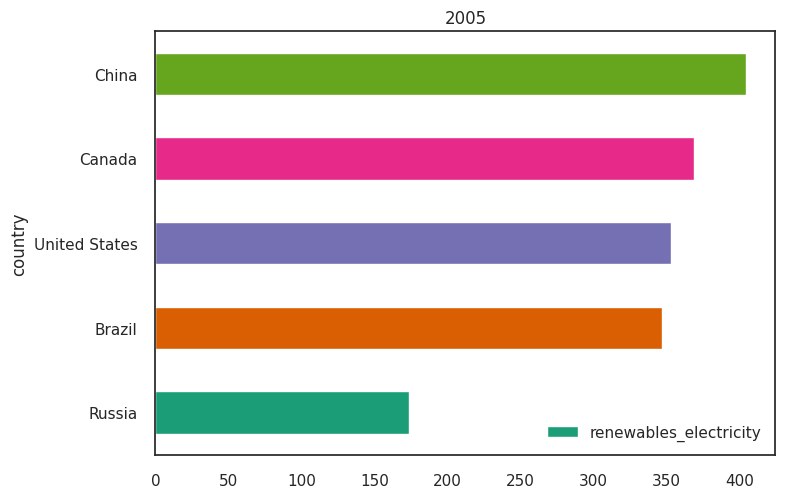

In [ ]:
cmap = plt.get_cmap('Dark2')
df_most_ren[df_most_ren['year']==2005].sort_values('renewables_electricity').plot.barh(x='country',y='renewables_electricity',color=cmap.colors);
plt.title('2005');


#### Bar chart race

In [ ]:
# converting to wide format
df_most_ren_wide = df_most_ren.pivot(index='year',columns='country',values='renewables_electricity')
df_most_ren_wide

country,Brazil,Canada,China,India,Russia,United States
year,,,,,,
2000,308.77,363.70,225.56,NaN,164.21,350.93
2001,273.71,339.58,280.73,NaN,174.10,280.06
2002,292.95,357.06,291.41,NaN,162.55,336.34
2003,313.88,343.88,287.28,NaN,156.43,349.18
2004,329.43,347.68,357.43,NaN,176.65,345.14
2005,346.96,368.86,404.37,NaN,173.53,353.04
2006,359.55,360.48,446.72,NaN,174.29,381.16
2007,387.88,375.42,500.71,NaN,178.00,347.91
2008,385.61,385.21,665.08,NaN,165.69,377.11


In [ ]:
df_bcr=df_most_ren_wide.fillna(0)
# df_bcr=df_bcr.drop(2022,axis=0)
df_bcr

country,Brazil,Canada,China,India,Russia,United States
year,,,,,,
2000,308.77,363.70,225.56,0.00,164.21,350.93
2001,273.71,339.58,280.73,0.00,174.10,280.06
2002,292.95,357.06,291.41,0.00,162.55,336.34
2003,313.88,343.88,287.28,0.00,156.43,349.18
2004,329.43,347.68,357.43,0.00,176.65,345.14
2005,346.96,368.86,404.37,0.00,173.53,353.04
2006,359.55,360.48,446.72,0.00,174.29,381.16
2007,387.88,375.42,500.71,0.00,178.00,347.91
2008,385.61,385.21,665.08,0.00,165.69,377.11


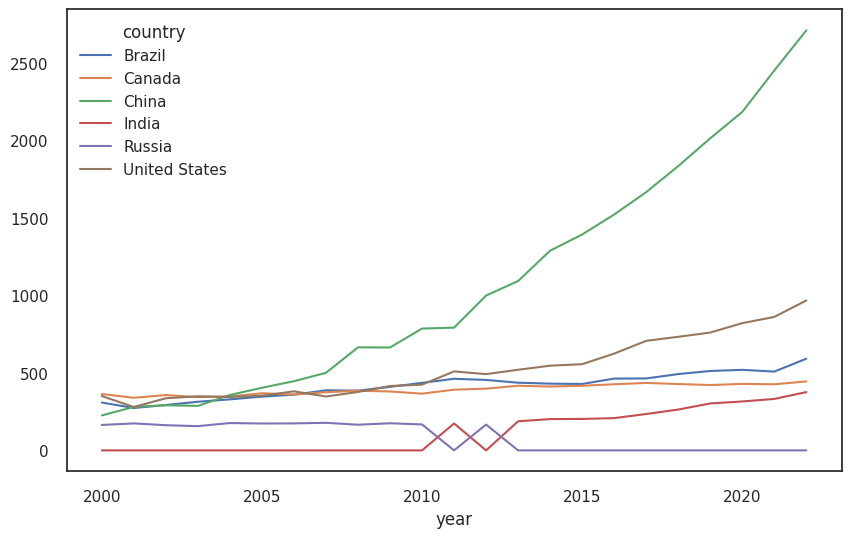

In [ ]:

df_bcr.plot(figsize=(10, 6));


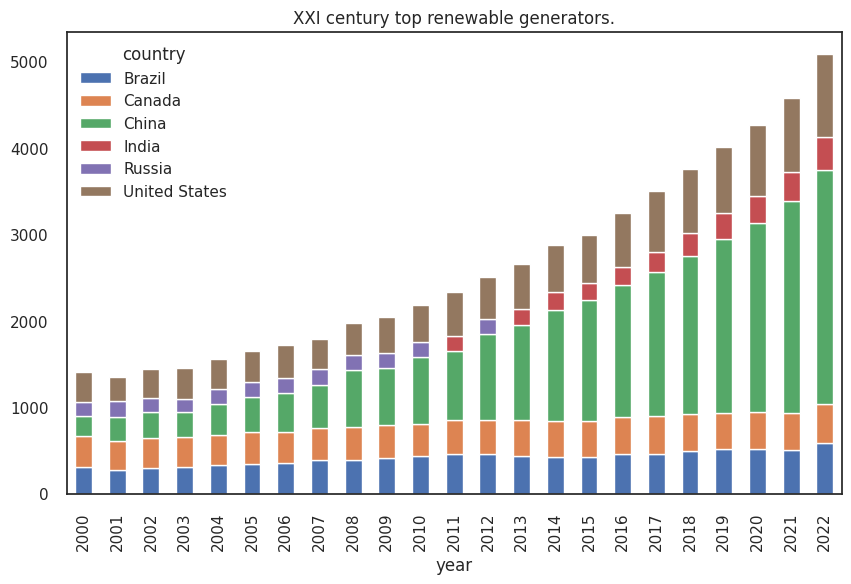

In [ ]:
df_bcr.plot(kind='bar', stacked=True,
        title='XXI century top renewable generators.',
           figsize=(10, 6))
plt.show()

In [ ]:
bcr.bar_chart_race(df_bcr,steps_per_period=15, period_length=700,figsize=(5, 3),orientation='h',n_bars=5,title='Top renewable generators (TWh)')


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


### R1: China, USA, Brazil, Canada and India are the top generators in the 21 century.

### 2.Which countries had the highest growth from 2017 to 2022 in renewable generation?


In [ ]:
energy_df_1.head()

,country,year,population,gdp,biofuel_electricity,hydro_electricity,nuclear_electricity,solar_electricity,wind_electricity,coal_electricity,...,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,oil_elec_per_capita,renewables_electricity,renewables_elec_per_capita,fossil_electricity
123,Afghanistan,2000,19542986.0,1.128379e+10,0.0,0.31,0.0,0.0,0.0,0.0,...,15.862,0.0,0.0,0.0,0.0,0.0,8.187,0.31,15.862,0.16
124,Afghanistan,2001,19688634.0,1.102127e+10,0.0,0.50,0.0,0.0,0.0,0.0,...,25.395,0.0,0.0,0.0,0.0,0.0,4.571,0.50,25.395,0.09
125,Afghanistan,2002,21000258.0,1.880487e+10,0.0,0.56,0.0,0.0,0.0,0.0,...,26.666,0.0,0.0,0.0,0.0,0.0,6.190,0.56,26.666,0.13
126,Afghanistan,2003,22645136.0,2.107434e+10,0.0,0.63,0.0,0.0,0.0,0.0,...,27.821,0.0,0.0,0.0,0.0,0.0,13.689,0.63,27.821,0.31
127,Afghanistan,2004,23553554.0,2.233257e+10,0.0,0.56,0.0,0.0,0.0,0.0,...,23.776,0.0,0.0,0.0,0.0,0.0,14.011,0.56,23.776,0.33


In [ ]:
last_5_years = energy_df_1[energy_df_1['year'] >= 2017 ]

In [ ]:
last_5_years = last_5_years[['country','year', 'renewables_electricity']]
last_5_years

,country,year,renewables_electricity
140,Afghanistan,2017,1.09
141,Afghanistan,2018,0.97
142,Afghanistan,2019,0.89
143,Afghanistan,2020,0.68
144,Afghanistan,2021,0.70
...,...,...,...
22007,Zimbabwe,2018,5.46
22008,Zimbabwe,2019,4.58
22009,Zimbabwe,2020,4.19
22010,Zimbabwe,2021,4.42


In [ ]:
last_5_years.reset_index(drop=True,inplace=True)
last_5_years

,country,year,renewables_electricity
0,Afghanistan,2017,1.09
1,Afghanistan,2018,0.97
2,Afghanistan,2019,0.89
3,Afghanistan,2020,0.68
4,Afghanistan,2021,0.70
...,...,...,...
1203,Zimbabwe,2018,5.46
1204,Zimbabwe,2019,4.58
1205,Zimbabwe,2020,4.19
1206,Zimbabwe,2021,4.42


In [ ]:
df_2022 = last_5_years[last_5_years['year']==2022]
df_2022.head()

,country,year,renewables_electricity
15,Algeria,2022,0.769
26,Angola,2022,11.660
37,Argentina,2022,45.150
53,Australia,2022,81.300
59,Austria,2022,49.350


In [ ]:
df_2017 = last_5_years[last_5_years['year']==2017]
df_2017.head()

,country,year,renewables_electricity
0,Afghanistan,2017,1.09
5,Albania,2017,4.48
10,Algeria,2017,0.64
16,American Samoa,2017,0.00
21,Angola,2017,7.69


In [ ]:
df_2017=df_2017[df_2017['country'].isin(df_2022.country)]
df_2017.shape

(109, 3)

In [ ]:
df_2022.reset_index(drop=True,inplace=True)
df_2022.head()

,country,year,renewables_electricity
0,Algeria,2022,0.769
1,Angola,2022,11.660
2,Argentina,2022,45.150
3,Australia,2022,81.300
4,Austria,2022,49.350


In [ ]:
df_2017.reset_index(drop=True,inplace=True)
df_2017.head()

,country,year,renewables_electricity
0,Algeria,2017,0.64
1,Angola,2017,7.69
2,Argentina,2017,33.40
3,Australia,2017,40.77
4,Austria,2017,51.05


In [ ]:
df_2022.country == df_2017.country

0      True
1      True
2      True
3      True
4      True
       ... 
104    True
105    True
106    True
107    True
108    True
Name: country, Length: 109, dtype: bool

In [ ]:
df_growth = pd.DataFrame()
for pais in df_2022.country:
    v_2022 = df_2022[df_2022['country']== pais].renewables_electricity
    v_2017 = df_2017[df_2017['country']== pais].renewables_electricity
    growth = ( (v_2022 - v_2017) / v_2017 ) * 100
    df_temp = pd.DataFrame({'country':pais, 'growth_perc': round(growth,2)})
    df_growth = pd.concat([df_growth , df_temp])


In [ ]:
df_growth=df_growth[df_growth.growth_perc != np.inf]

In [ ]:
df_growth_top=df_growth.nlargest(10,'growth_perc')
df_growth_top.set_index('country',drop=True, inplace=True)

In [ ]:
df_growth_top.reset_index()

,country,growth_perc
0,Saudi Arabia,1095.71
1,United Arab Emirates,828.40
2,Oman,700.00
3,Kuwait,435.00
4,Israel,306.26
5,Kosovo,277.78
6,Yemen,215.79
7,Netherlands,176.53
8,Mongolia,156.00
9,Singapore,140.00


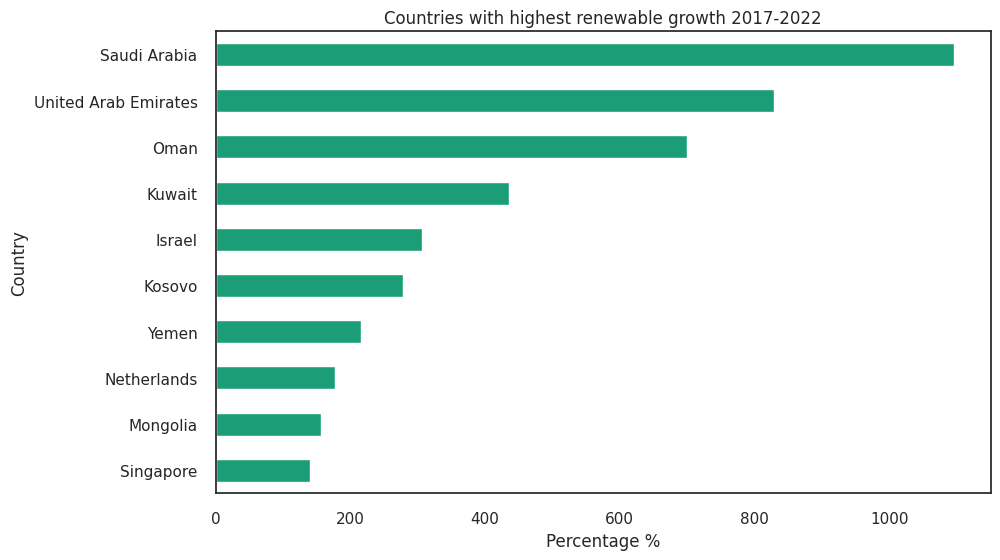

In [ ]:
colors = plt.cm.Set3.colors[:len(df_growth_top)]
df_growth_top.sort_values('growth_perc').plot.barh(color=cmap.colors, figsize=(10, 6))
plt.legend('', frameon=False)
plt.xlabel('Percentage %')
plt.ylabel('Country')
plt.title('Countries with highest renewable growth 2017-2022');

In [ ]:
colors

((0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353))

### R2: Saudi Arabia, United Arab Emirates, Oman, Kuwait and Israel	are the countries with the greatest growth in renewable energy production in the last 5 years.

In [ ]:
# Growth of the largest generators
top_generators = ['China', 'United States', 'Brazil', 'Canada']
df_growth[df_growth.country.isin(top_generators)]

,country,growth_perc
12,Brazil,27.47
16,Canada,2.26
19,China,62.63
102,United States,36.84


### 3. Top 5 countries per energy type

In [ ]:
energy_df_1.columns

Index(['country', 'year', 'population', 'gdp', 'biofuel_electricity',
       'hydro_electricity', 'nuclear_electricity', 'solar_electricity',
       'wind_electricity', 'coal_electricity', 'gas_electricity',
       'oil_electricity', 'other_renewable_exc_biofuel_electricity',
       'biofuel_elec_per_capita', 'hydro_elec_per_capita',
       'nuclear_elec_per_capita', 'solar_elec_per_capita',
       'wind_elec_per_capita', 'coal_elec_per_capita', 'gas_elec_per_capita',
       'oil_elec_per_capita', 'renewables_electricity',
       'renewables_elec_per_capita', 'fossil_electricity'],
      dtype='object')

In [ ]:
types=['biofuel_electricity',
       'hydro_electricity',
       'nuclear_electricity',
       'solar_electricity',
       'wind_electricity',
       'coal_electricity',
       'gas_electricity',
       'oil_electricity']

In [ ]:
year_sel = 2022


In [ ]:
df_per_type = pd.DataFrame()

for x in types:
    filtered_year =energy_df_1[energy_df_1.year == year_sel]
    n_per_type=filtered_year[['country', x ]].nlargest(3, x)
    n_per_type.reset_index(drop=True, inplace=True)
    dict_temp = {'type':x,
             '1': [n_per_type.country[0]],
             '2':[ n_per_type.country[1]],
             '3': [n_per_type.country[2]]}
    df_dict_temp = pd.DataFrame(dict_temp)
    df_per_type = pd.concat([df_per_type , df_dict_temp])

df_per_type


,type,1,2,3
0,biofuel_electricity,China,Brazil,United States
0,hydro_electricity,China,Brazil,Canada
0,nuclear_electricity,United States,China,France
0,solar_electricity,China,United States,Japan
0,wind_electricity,China,United States,Germany
0,coal_electricity,China,India,United States
0,gas_electricity,United States,Russia,Japan
0,oil_electricity,Saudi Arabia,Iran,Mexico


In [ ]:
df_per_type.set_index('type',inplace=True)

In [ ]:
df_per_type

,1,2,3
type,,,
biofuel_electricity,China,Brazil,United States
hydro_electricity,China,Brazil,Canada
nuclear_electricity,United States,China,France
solar_electricity,China,United States,Japan
wind_electricity,China,United States,Germany
coal_electricity,China,India,United States
gas_electricity,United States,Russia,Japan
oil_electricity,Saudi Arabia,Iran,Mexico


### R3 : China and the USA lead most of categories. Regarding oil based generation, we see other countries, including Mexico in the 3rd position.

### 4. How much does GDP influence in renewable energy generation?

In [ ]:
filtered_year.head()

,country,year,population,gdp,biofuel_electricity,hydro_electricity,nuclear_electricity,solar_electricity,wind_electricity,coal_electricity,...,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,oil_elec_per_capita,renewables_electricity,renewables_elec_per_capita,fossil_electricity
710,Algeria,2022,44903228.0,5.903176e+11,0.00,0.077,0.00,0.682,0.01,0.00,...,1.710,0.000,15.183,0.234,0.000,1616.190,118.158,0.769,17.127,76.62
875,Angola,2022,35588996.0,1.759296e+11,0.14,11.500,0.00,0.020,0.00,0.00,...,333.297,0.000,0.580,0.000,0.000,58.254,79.991,11.660,337.934,4.77
1082,Argentina,2022,45510324.0,8.293733e+11,2.07,26.150,7.47,2.910,14.02,2.69,...,574.595,164.139,63.942,308.062,59.107,1774.323,167.215,45.150,992.083,91.05
1634,Australia,2022,26177410.0,1.238560e+12,3.05,15.590,0.00,33.490,29.17,118.93,...,595.552,0.000,1279.347,1114.320,4543.230,1800.789,164.646,81.300,3105.731,170.38
1799,Austria,2022,8939617.0,3.822695e+11,3.62,36.070,0.00,2.730,6.93,0.14,...,4034.848,0.000,305.382,775.201,15.661,1315.493,384.804,49.350,5520.370,15.34


In [ ]:
filtered_year['gdp'].corr(filtered_year['renewables_electricity'])

0.8565397467486293

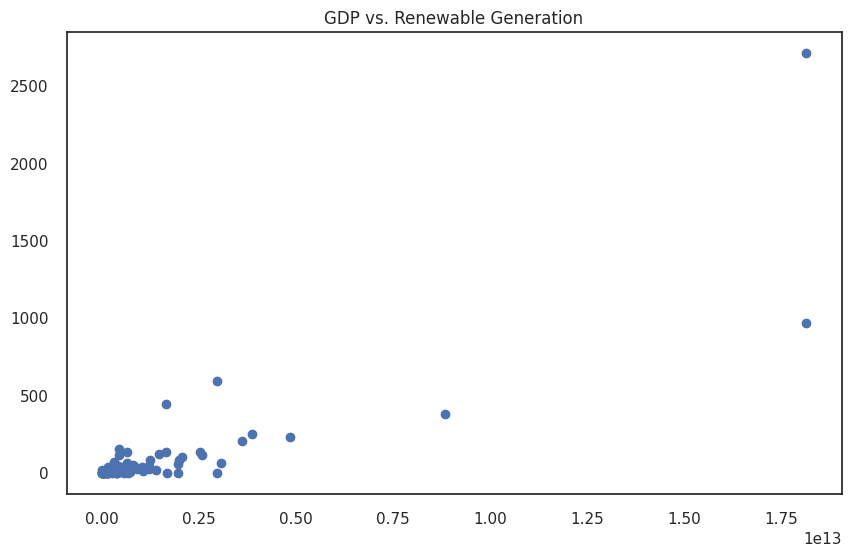

In [ ]:
plt.figure(figsize=(10, 6));
plt.scatter(filtered_year['gdp'], filtered_year['renewables_electricity'])
plt.title('GDP vs. Renewable Generation');

### R4: A correlation of 0.85 and the scatter plot show a strong relation betwen the GDP and the amount of reneable energy produced.

### 5. Forecast world renewable generation

In [ ]:
world_df_full = energy_df_0[energy_df_0['country']=='World'][['year','renewables_electricity']]
world_df_full


,year,renewables_electricity
21509,1900,NaN
21510,1901,NaN
21511,1902,NaN
21512,1903,NaN
21513,1904,NaN
...,...,...
21627,2018,6646.42
21628,2019,7007.46
21629,2020,7475.85
21630,2021,7892.81


In [ ]:
world_65_22=world_df_full[world_df_full.year >= 1965]
world_65_22.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


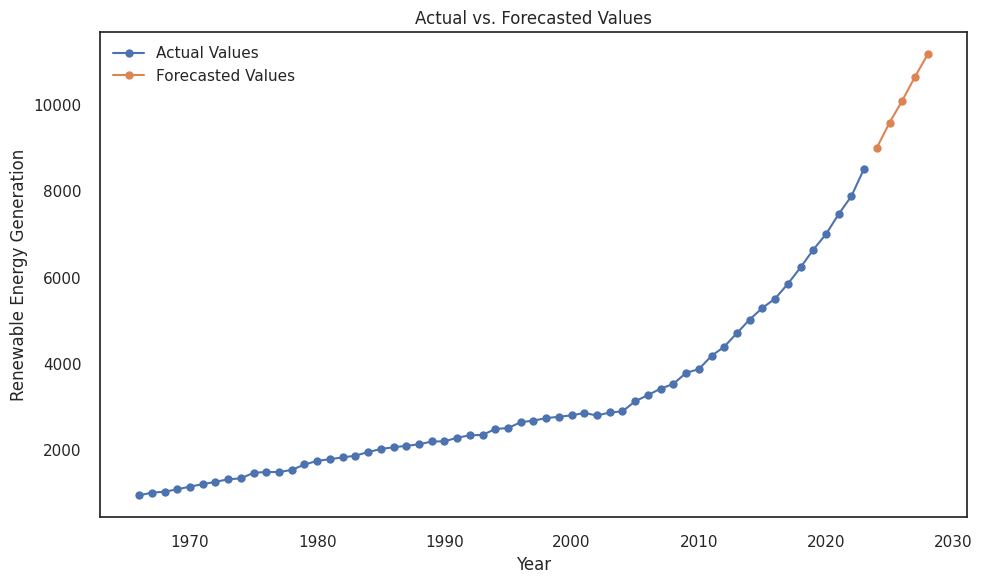

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Given time series data
data = world_65_22['renewables_electricity'].to_numpy()

# Create a date range from 1965 to 2022
dates = pd.date_range(start='1965-01-01', end='2022-12-31', freq='A')

# Create a pandas DataFrame with the time series data
df = pd.DataFrame(data, index=dates, columns=['Renewable Energy Generation'])

# Fit ARIMA model to the data
order = (2, 1, 0)  # ARIMA(p, d, q) parameters
model = ARIMA(df, order=order)
model_fit = model.fit()

# Forecast the next 5 values
forecast_values = model_fit.forecast(steps=5)

# Extract the actual values for the last 5 years (assuming the original data has the same frequency 'A')
actual_values = df.iloc[-5:].values.flatten()

# Calculate the forecast errors
forecast_errors = actual_values - forecast_values

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

# Plot the actual values and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Renewable Energy Generation'], label='Actual Values', marker='o')
plt.plot(pd.date_range(start='2023-01-01', periods=5, freq='A'), forecast_values, label='Forecasted Values', marker='o')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Generation')
plt.title('Actual vs. Forecasted Values')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()



### 6. Top generators per capita

In [ ]:
energy_df_1

,country,year,population,gdp,biofuel_electricity,hydro_electricity,nuclear_electricity,solar_electricity,wind_electricity,coal_electricity,...,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita,coal_elec_per_capita,gas_elec_per_capita,oil_elec_per_capita,renewables_electricity,renewables_elec_per_capita,fossil_electricity
123,Afghanistan,2000,19542986.0,1.128379e+10,0.00,0.31,0.0,0.00,0.0,0.00,...,15.862,0.0,0.000,0.0,0.000,0.0,8.187,0.31,15.862,0.16
124,Afghanistan,2001,19688634.0,1.102127e+10,0.00,0.50,0.0,0.00,0.0,0.00,...,25.395,0.0,0.000,0.0,0.000,0.0,4.571,0.50,25.395,0.09
125,Afghanistan,2002,21000258.0,1.880487e+10,0.00,0.56,0.0,0.00,0.0,0.00,...,26.666,0.0,0.000,0.0,0.000,0.0,6.190,0.56,26.666,0.13
126,Afghanistan,2003,22645136.0,2.107434e+10,0.00,0.63,0.0,0.00,0.0,0.00,...,27.821,0.0,0.000,0.0,0.000,0.0,13.689,0.63,27.821,0.31
127,Afghanistan,2004,23553554.0,2.233257e+10,0.00,0.56,0.0,0.00,0.0,0.00,...,23.776,0.0,0.000,0.0,0.000,0.0,14.011,0.56,23.776,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,15052191.0,2.271535e+10,0.39,5.05,0.0,0.02,0.0,3.69,...,335.499,0.0,1.329,0.0,245.147,0.0,2.657,5.46,362.738,3.73
22008,Zimbabwe,2019,15354606.0,2.271535e+10,0.38,4.17,0.0,0.03,0.0,3.62,...,271.580,0.0,1.954,0.0,235.760,0.0,2.605,4.58,298.282,3.66
22009,Zimbabwe,2020,15669663.0,2.271535e+10,0.35,3.81,0.0,0.03,0.0,3.36,...,243.145,0.0,1.915,0.0,214.427,0.0,2.553,4.19,267.396,3.40
22010,Zimbabwe,2021,15993525.0,2.271535e+10,0.38,4.00,0.0,0.04,0.0,3.57,...,250.101,0.0,2.501,0.0,223.215,0.0,2.501,4.42,276.362,3.61


In [ ]:
df_most_renPC = pd.DataFrame()
for year in energy_df_1.year.unique():
    year_filtered = energy_df_1[energy_df_1['year']==year]
    top=year_filtered[['year','country','renewables_elec_per_capita']].nlargest(5,'renewables_elec_per_capita')
    df_most_renPC=pd.concat([df_most_renPC,top])

In [ ]:
df_most_renPC

,year,country,renewables_elec_per_capita
14568,2000,Norway,31641.850
9143,2000,Iceland,27036.727
3751,2000,Canada,11853.349
15905,2000,Paraguay,10336.044
18737,2000,Sweden,9372.067
...,...,...,...
9165,2022,Iceland,53916.359
14590,2022,Norway,27806.586
3773,2022,Canada,11578.931
18759,2022,Sweden,11128.649


In [ ]:
df_most_renPC.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [ ]:
df_most_renPC_wide = df_most_renPC.pivot(index='year',columns='country',values='renewables_elec_per_capita')
df_most_renPC_wide

country,Bhutan,Canada,Iceland,New Zealand,Norway,Paraguay,Sweden
year,,,,,,,
2000,NaN,11853.349,27036.727,NaN,31641.850,10336.044,9372.067
2001,NaN,10953.216,27905.836,NaN,26747.781,8607.820,9365.220
2002,NaN,11399.509,28978.559,NaN,28578.133,9028.632,7971.086
2003,NaN,10875.583,29088.426,6691.635,23225.875,9573.605,NaN
2004,NaN,10895.073,29210.162,NaN,23820.391,9491.672,7571.969
2005,NaN,11449.620,28986.287,NaN,29526.195,9247.965,8973.967
2006,NaN,11080.829,32392.154,NaN,25830.918,9621.148,7804.739
2007,9521.378,11423.979,38126.203,NaN,28652.225,9514.954,NaN
2008,9989.257,11596.234,51428.605,NaN,29431.787,9726.926,NaN


In [ ]:
df_most_renPC_wide=df_most_renPC_wide.fillna(0)
df_most_renPC_wide

country,Bhutan,Canada,Iceland,New Zealand,Norway,Paraguay,Sweden
year,,,,,,,
2000,0.000,11853.349,27036.727,0.000,31641.850,10336.044,9372.067
2001,0.000,10953.216,27905.836,0.000,26747.781,8607.820,9365.220
2002,0.000,11399.509,28978.559,0.000,28578.133,9028.632,7971.086
2003,0.000,10875.583,29088.426,6691.635,23225.875,9573.605,0.000
2004,0.000,10895.073,29210.162,0.000,23820.391,9491.672,7571.969
2005,0.000,11449.620,28986.287,0.000,29526.195,9247.965,8973.967
2006,0.000,11080.829,32392.154,0.000,25830.918,9621.148,7804.739
2007,9521.378,11423.979,38126.203,0.000,28652.225,9514.954,0.000
2008,9989.257,11596.234,51428.605,0.000,29431.787,9726.926,0.000


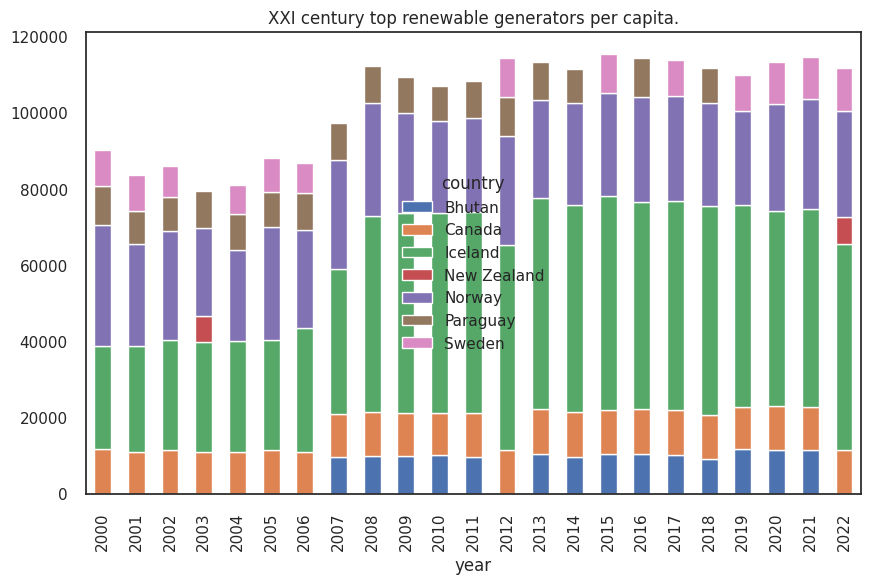

In [ ]:
df_most_renPC_wide.plot(kind='bar', stacked=True,
        title='XXI century top renewable generators per capita.',
           figsize=(10, 6))
plt.show()

In [ ]:
bcr.bar_chart_race(df_most_renPC_wide,steps_per_period=15, period_length=700,figsize=(6, 4),orientation='h',n_bars=5,title='Top renewable generators per capita (TWh)')


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


### R6: Iceland, Norway, Bhutan and Canada are top renwable energy producers per capita.

## Conclusions

This analysis began with importing the data from a URL, understanding whta the data is about and keeping the information relevant to the project's purpose. A good amount of cleaning was needed and also dealing with NaNs. The information found can be summarized in this:

- R1: China, USA, Brazil, Canada and India are the top generators in the 21 century.
- R2: Saudi Arabia, United Arab Emirates, Oman, Kuwait and Israel are the countries with the greatest growth in renewable energy production in the last 5 years
- R3 : in 2022, China and the USA lead most of categories of energy sources. Mexico was the 3rd in oil generation this year.
- R4: A correlation of 0.85 and the scatter plot show a strong relation betwen the GDP and the amount of reneable energy produced
- R5: A forecast made shows the trend of growth for the next five years.
- R6: Iceland, Norway, Bhutan and Canada are top renwable energy producers per capita.
